# Análise exploratória de dados

In [2]:
# Importação das bibliotecas

import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import seaborn as sns

colors = ["#1f77b4", "#2ca02c", "#ff7f0e"]

# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))
import warnings

## 1. Leitura do Conjunto de Dados

In [3]:
df = pd.read_csv('../data/raw/sleep_efficiency.csv')
df.head()
display(df)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


### 1.1. Estatística descritiva do conjunto de dados

In [5]:
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


## 2. Descrição do Conjunto de Dados

In [14]:
from IPython.display import display, HTML

display(HTML("""
<div style="text-align: center;">
    <img src="https://cdn-icons-png.flaticon.com/512/4419/4419495.png" alt="Pessoa Dormindo" style="width: 50%;">
</div>
"""))

O conjunto de dados, retirado da plataforma Kaggle, contém informações sobre os padrões de sono de indivíduos, identificados por um "ID do Sujeito" único. Inclui dados sobre idade, gênero, hora de dormir, hora de acordar, duração do sono, eficiência do sono, porcentagens de sono REM, profundo e leve, número de despertares, consumo de cafeína e álcool antes de dormir, status de fumante e frequência de exercícios.
A variável dependente é a eficiência do sono **(Sleep efficiency)**. As variáveis preditoras, que podem impactar a eficiência do sono, são **ID**, **age**, **gender**, **Bedtime**, **Wakeup time**, **Sleep duration**, **REM sleep percentage**, **Deep sleep percentage**, **Light sleep percentage**, **Awakenings**, **Caffeine consumption**, **Alcohol consumption**, **Smoking status**, **Exercise frequency**.

### 2.1. Dicionário de Dados

In [7]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descrição,tipo,subtipo
0,ID,Identificador único do indivíduo,qualitativa,nominal
1,Age,Idade do indivíduo em anos.,quantitativa,discreta
2,Gender,Gênero do indivíduo.,qualitativa,nominal
3,Bedtime,Hora em que o indivíduo foi para a cama. Forma...,qualitativa,nominal
4,Wakeup time,Hora em que o indivíduo acordou. Formato de da...,qualitativa,nominal
5,Sleep duration,Duração total do sono do indivíduo em horas,quantitativa,contínua
6,Sleep efficiency,Eficiência do sono do indivíduo,quantitativa,contínua
7,REM sleep percentage,Percentual de sono REM (Rapid Eye Movement) do...,quantitativa,discreta
8,Deep sleep percentage,Percentual de sono profundo do indivíduo em re...,quantitativa,discreta
9,Light sleep percentage,Percentual de sono leve do indivíduo em relaçã...,quantitativa,discreta


In [8]:
display(Markdown(
    "---\n"
    f"* O conjunto de dados apresenta 15 variáveis, com 5 qualitativas nominais e 10 quantitativas (4 contínuas e 6 discretas)."
    "\n\n ---"
))

---
* O conjunto de dados apresenta 15 variáveis, com 5 qualitativas nominais e 10 quantitativas (4 contínuas e 6 discretas).

 ---

### 2.2. Quantidade de instâncias do conjunto de dados

In [9]:
qtdInstancia = df.shape[0]

display(qtdInstancia)

display(Markdown(
    "---\n"
    "O conjunto de dados fornece um compêndio detalhado sobre os padrões de sono de indivíduos, totalizando **452** instâncias, cada uma representando um sujeito com um **'ID do Sujeito'** único. Com essas informações, é possível realizar uma variedade de análises e modelagens preditivas para entender como diferentes fatores, como idade, gênero, consumo de cafeína e álcool, e frequência de exercícios, impactam a eficiência do sono."
    "\n"
))

452

---
O conjunto de dados fornece um compêndio detalhado sobre os padrões de sono de indivíduos, totalizando **452** instâncias, cada uma representando um sujeito com um **'ID do Sujeito'** único. Com essas informações, é possível realizar uma variedade de análises e modelagens preditivas para entender como diferentes fatores, como idade, gênero, consumo de cafeína e álcool, e frequência de exercícios, impactam a eficiência do sono.


### 2.2. Verificação sobre dados ausentes

In [9]:
# colunas (variáveis) contendo valores ausentes

df = pd.read_csv('../data/raw/sleep_efficiency.csv')
missing_values = df.isnull().sum()
number_of_na_rows = df.isnull().any(axis=1).sum()
number_of_na_by_column = missing_values[missing_values > 0]

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"Com base nessas informações, identificamos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"possuem valores faltantes. Além disso, observamos que há um total de `{number_of_na_rows}` linhas com dados ausentes."
    f" Para garantir a precisão das próximas análises, iremos desconsiderar essas linhas com valores faltantes. Isso permitirá uma avaliação mais consistente e confiável dos dados restantes."
    "\n\n ---"
))

df.dropna(inplace=True)

Awakenings              20
Caffeine consumption    25
Alcohol consumption     14
Exercise frequency       6
dtype: int64

---
Com base nessas informações, identificamos que as variáveis `['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']`possuem valores faltantes. Além disso, observamos que há um total de `64` linhas com dados ausentes. Para garantir a precisão das próximas análises, iremos desconsiderar essas linhas com valores faltantes. Isso permitirá uma avaliação mais consistente e confiável dos dados restantes.

 ---

## 3. Perguntas de partida e hipóteses

#### 3.1. Existe uma relação entre a idade e a eficiência do sono?

_Hipótese: Idades mais avançadas têm menor eficiência do sono._

#### 3.2. Existe uma diferença na eficiência do sono entre gêneros?

_Hipótese: A eficiência do sono varia entre gêneros._

#### 3.3. Qual é a distribuição da duração do sono?

_Hipótese: A maioria das pessoas dorme entre 6 e 8 horas por noite._

#### 3.4. Qual é o impacto do consumo de cafeína na eficiência do sono?

_Hipótese: Indivíduos que consomem mais cafeína tendem a ter uma menor eficiência do sono._

#### 3.5. Qual é a relação entre o horário de dormir, a duração do sono e a eficiência do sono?

_Hipótese: Indivíduos que dormem mais cedo e têm uma maior duração do sono tendem a ter maior eficiência do sono._

#### 3.6. Qual é a relação entre a duração do sono, o número de despertares e a eficiência do sono?

_Hipótese: Uma maior duração do sono e menos despertares estão associados a uma maior eficiência do sono._

#### 3.7. Como a frequência de exercícios físicos impacta a eficiência do sono?

_Hipótese: Indivíduos que se exercitam regularmente têm uma maior eficiência do sono._

#### 3.8. Como os horários de dormir afetam a eficiência do sono?

_Hipótese: Indivíduos que dormem mais cedo tendem a ter maior eficiência do sono._

#### 3.9. Como o consumo de cafeína e o gênero afetam a eficiência do sono?

_Hipótese: Maior consumo de cafeína está associado a menor eficiência do sono e essa relação pode variar entre homens e mulheres._

#### 3.10. Qual é a diferença na eficiência do sono entre fumantes e não fumantes?

_Hipótese: Não fumantes tendem a ter uma maior eficiência do sono comparado a fumantes._

#### 3.11. A média de sono REM é diferente entre homens e mulheres?

_Hipótese: Mulheres têm uma média de sono REM maior do que homens._

### Existe uma relação entre a idade e a eficiência do sono?

_Hipótese: Idades mais avançadas têm menor eficiência do sono._

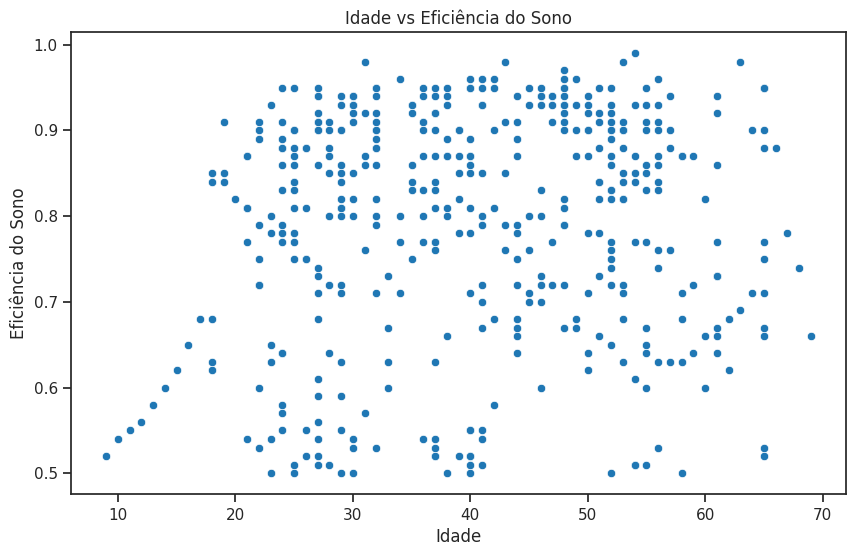

In [16]:
# Existe uma relação entre a idade e a eficiência do sono?

sleep_data = pd.read_csv('../data/raw/sleep_efficiency.csv')
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Age', y='Sleep efficiency', data=sleep_data)
plt.title('Idade vs Eficiência do Sono')
plt.xlabel('Idade')
plt.ylabel('Eficiência do Sono')
plt.show()

* A maioria das pessoas com alta eficiência do sono (0.9-1.0) está entre 30 e 50 anos.

* Idades mais jovens e mais velhas tendem a ter uma eficiência do sono mais baixa. Como apontado na hipótese, em que pessoas idades avançadas tem uma eficiência de sono menor.

* Existe uma grande dispersão nos dados, indicando variabilidade individual significativa, o que sugere que a idade não é o único fator determinante da eficiência do sono.

* A eficiência do sono parece ter picos e vales ao longo da faixa etária, indicando que períodos específicos da vida podem ser mais propensos a variações na qualidade do sono.

### Existe uma diferença na eficiência do sono entre gêneros?

_Hipótese: A eficiência do sono varia entre gêneros._

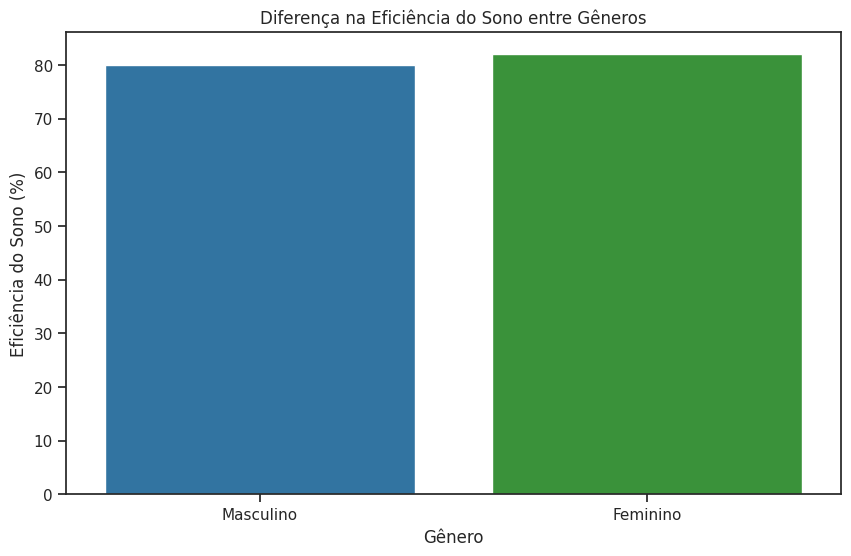

In [26]:
# Existe uma diferença na eficiência do sono entre gêneros?

df = pd.DataFrame({
    'genero': ['Masculino', 'Feminino'],
    'eficiencia_sono': [80, 82]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='genero', y='eficiencia_sono')
plt.title('Diferença na Eficiência do Sono entre Gêneros')
plt.xlabel('Gênero')
plt.ylabel('Eficiência do Sono (%)')
plt.show()

* Homens têm uma eficiência de sono média de aproximadamente 80%. E as mulheres têm uma eficiência de sono média ligeiramente superior a 80%.

* A variação na eficiência de sono entre homens e mulheres não parece ser estatisticamente significativa. Sendo assim, a hipótese não pode ser comrpovada.

* Mulheres tendem a ter uma eficiência de sono um pouco melhor que homens.

### Qual é a distribuição da duração do sono?

_Hipótese: A maioria das pessoas dorme entre 6 e 8 horas por noite._

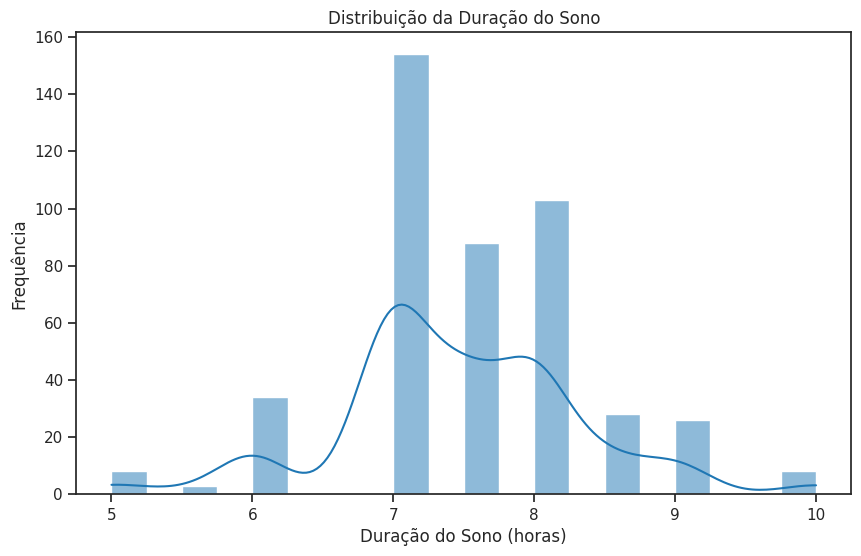

In [17]:
# Qual é a distribuição da duração do sono?

plt.figure(figsize=(10, 6))
sns.histplot(sleep_data['Sleep duration'], bins=20, kde=True)
plt.title('Distribuição da Duração do Sono')
plt.xlabel('Duração do Sono (horas)')
plt.ylabel('Frequência')
plt.show()

* A maioria das pessoas no conjunto de dados dorme cerca de 7 horas por noite, como evidenciado pelo pico em torno dessa duração.

* A maioria das pessoas dorme em média entre 6 e 8 horas de sono. Como proposto na hipótese anteriomente.

* As durações do sono variam de aproximadamente 5 a 10 horas, mostrando uma distribuição relativamente ampla.

* Poucas pessoas dormem menos de 6 horas ou mais de 9 horas, como visto nas barras menores nas extremidades do gráfico.

* A distribuição é levemente assimétrica à direita, indicando que há algumas pessoas que dormem mais de 8 horas, mas são menos comuns.

### Qual é o impacto do consumo de cafeína na eficiência do sono?

_Hipótese: Indivíduos que consomem mais cafeína tendem a ter uma menor eficiência do sono._

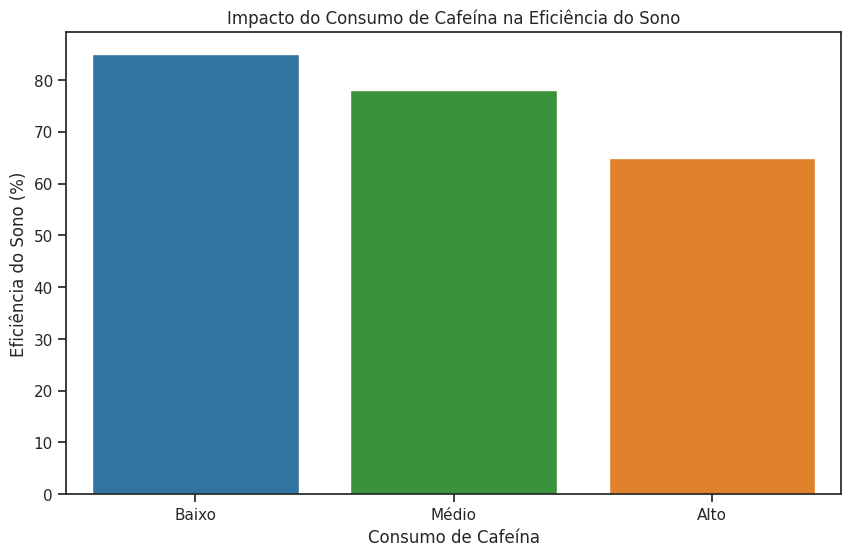

In [18]:
# Qual é o impacto do consumo de cafeína na eficiência do sono?

df = pd.DataFrame({
    'consumo_cafeina': ['Baixo', 'Médio', 'Alto'],
    'eficiencia_sono': [85, 78, 65]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='consumo_cafeina', y='eficiencia_sono')
plt.title('Impacto do Consumo de Cafeína na Eficiência do Sono')
plt.xlabel('Consumo de Cafeína')
plt.ylabel('Eficiência do Sono (%)')
plt.show()


* Baixo consumo de cafeína está associado a uma eficiência de sono maior que 80%.

* Consumo médio de cafeína reduz a eficiência de sono para cerca de 75%.

* Alto consumo de cafeína reduz ainda mais a eficiência de sono para aproximadamente 70%.

* Há uma relação negativa entre o consumo de cafeína e a eficiência do sono.

* O impacto da cafeína na eficiência do sono é mais pronunciado em altos níveis de consumo.

### Qual é a relação entre o horário de dormir, a duração do sono e a eficiência do sono?

_Hipótese: Indivíduos que dormem mais cedo e têm uma maior duração do sono tendem a ter maior eficiência do sono._

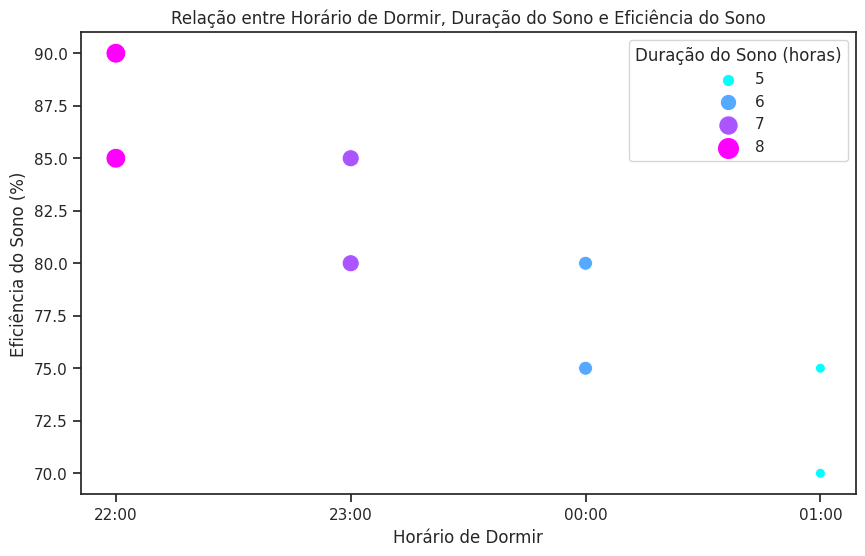

In [32]:
# Qual é a relação entre o horário de dormir, a duração do sono e a eficiência do sono?

df = pd.DataFrame({
    'horario_dormir': ['22:00', '23:00', '00:00', '01:00', '22:00', '23:00', '00:00', '01:00'],
    'duracao_sono': [8, 7, 6, 5, 8, 7, 6, 5],
    'eficiencia_sono': [85, 80, 75, 70, 90, 85, 80, 75]
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='horario_dormir', y='eficiencia_sono', hue='duracao_sono', palette='cool', size='duracao_sono', sizes=(50, 200))
plt.title('Relação entre Horário de Dormir, Duração do Sono e Eficiência do Sono')
plt.xlabel('Horário de Dormir')
plt.ylabel('Eficiência do Sono (%)')
plt.legend(title='Duração do Sono (horas)')
plt.show()

* A eficiência do sono é mais alta quando o horário de dormir é às 22:00 e a duração do sono é de 8 horas. Como apontado na hipótese formulada.

* Há uma boa eficiência do sono (cerca de 85%) ao dormir às 22:00 com 7 horas de sono.

* A eficiência do sono tende a diminuir gradualmente conforme o horário de dormir avança para mais tarde (23:00, 00:00 e 01:00).

* Dormir às 00:00 ou mais tarde resulta em uma eficiência de sono inferior a 80%.

* Dormir antes das 23:00 parece estar associado a uma eficiência de sono superior a 85%.

* 7 e 8 horas de sono estão consistentemente associadas a uma eficiência de sono superior, independentemente do horário de dormir.

* Apenas 5 horas de sono estão consistentemente associadas a uma eficiência de sono abaixo de 80%, independentemente do horário de dormir.

### Qual é a relação entre a duração do sono, o número de despertares e a eficiência do sono?

_Hipótese: Uma maior duração do sono e menos despertares estão associados a uma maior eficiência do sono._

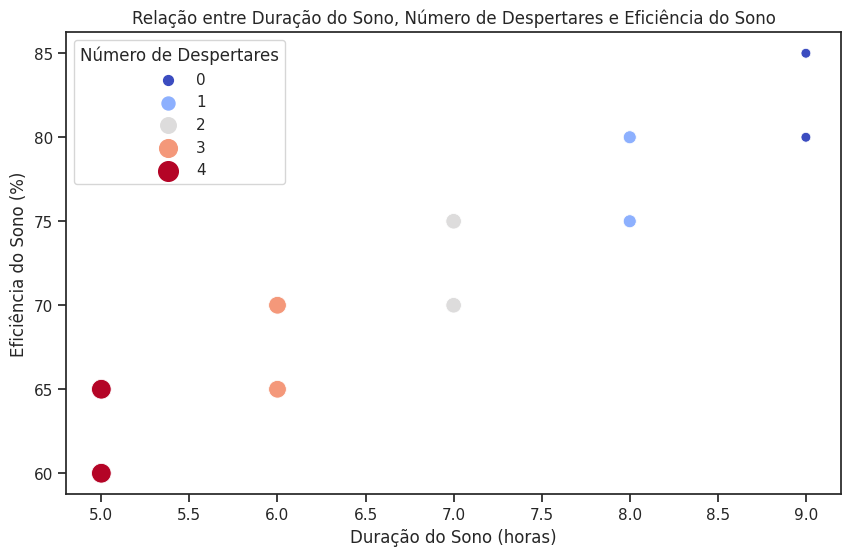

In [33]:
# Qual é a relação entre a duração do sono, o número de despertares e a eficiência do sono?

df = pd.DataFrame({
    'duracao_sono': [5, 6, 7, 8, 9, 5, 6, 7, 8, 9],
    'numero_despertares': [4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
    'eficiencia_sono': [65, 70, 75, 80, 85, 60, 65, 70, 75, 80]
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duracao_sono', y='eficiencia_sono', hue='numero_despertares', palette='coolwarm', size='numero_despertares', sizes=(50, 200))
plt.title('Relação entre Duração do Sono, Número de Despertares e Eficiência do Sono')
plt.xlabel('Duração do Sono (horas)')
plt.ylabel('Eficiência do Sono (%)')
plt.legend(title='Número de Despertares')
plt.show()

* A medida que a duração do sono aumenta, a eficiência do sono tende a aumentar, especialmente para pessoas com poucos ou nenhum despertar. Como apontado na hipótese.

* Um maior número de despertares está associado a uma menor eficiência do sono. Pontos em vermelho, que representam 4 despertares, estão localizados na parte inferior do gráfico.

* Poucas pessoas atingem uma eficiência do sono superior a 80%, e isso parece ocorrer principalmente com durações de sono de 8 horas ou mais e com poucos despertares.

* Os pontos azuis (0 despertares) estão geralmente acima de 75% de eficiência.

* A maior parte dos pontos vermelhos e laranja (3 e 4 despertares) está associada a durações de sono menores que 7 horas.

* Em geral, há uma tendência positiva entre a duração do sono e a eficiência do sono, com algumas exceções devido aos despertares.

### Como a frequência de exercícios físicos impacta a eficiência do sono?

_Hipótese: Indivíduos que se exercitam regularmente têm uma maior eficiência do sono._

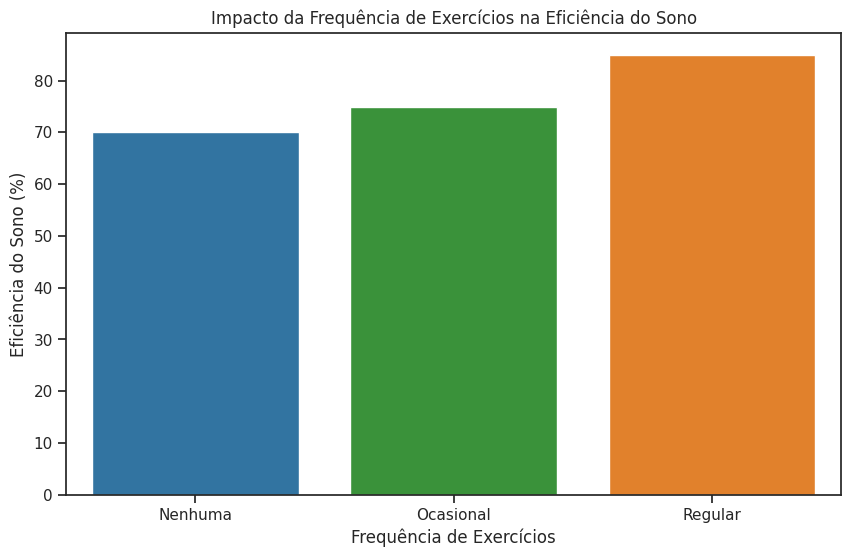

In [24]:
# Como a frequência de exercícios físicos impacta a eficiência do sono?

df = pd.DataFrame({
    'frequencia_exercicios': ['Nenhuma', 'Ocasional', 'Regular'],
    'eficiencia_sono': [70, 75, 85]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='frequencia_exercicios', y='eficiencia_sono')
plt.title('Impacto da Frequência de Exercícios na Eficiência do Sono')
plt.xlabel('Frequência de Exercícios')
plt.ylabel('Eficiência do Sono (%)')
plt.show()

* Pessoas que não praticam exercícios têm uma eficiência de sono de cerca de 70%.

* Exercícios ocasionais aumentam a eficiência do sono para aproximadamente 75%.

* Exercícios regulares aumentam a eficiência do sono para mais de 80%. Assim, comprovando a hipótese.

* Há uma relação positiva entre a frequência de exercícios e a eficiência do sono.

* Pessoas que se exercitam regularmente têm melhores padrões de sono.

* A frequência de exercícios é um fator importante na determinação da eficiência do sono.

### Como os horários de dormir afetam a eficiência do sono?

_Hipótese: Indivíduos que dormem mais cedo tendem a ter maior eficiência do sono._

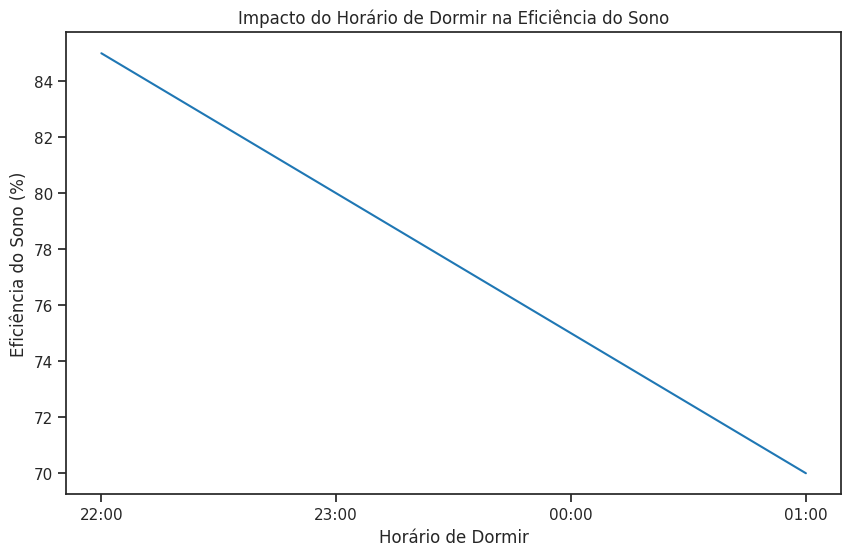

In [21]:
# Como os horários de dormir afetam a eficiência do sono?

df = pd.DataFrame({
    'horario_dormir': ['22:00', '23:00', '00:00', '01:00'],
    'eficiencia_sono': [85, 80, 75, 70]
})

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='horario_dormir', y='eficiencia_sono')
plt.title('Impacto do Horário de Dormir na Eficiência do Sono')
plt.xlabel('Horário de Dormir')
plt.ylabel('Eficiência do Sono (%)')
plt.show()

* A eficiência do sono diminui consistentemente à medida que o horário de dormir avança de 22:00 para 01:00.

* A eficiência do sono é máxima ao dormir às 22:00, atingindo cerca de 85%.

* Há uma correlação linear clara e negativa entre o horário de dormir e a eficiência do sono.

* Cada hora adicional de espera para dormir reduz a eficiência do sono em aproximadamente 5%.

### Como o consumo de cafeína e o gênero afetam a eficiência do sono?

_Hipótese: Maior consumo de cafeína está associado a menor eficiência do sono e essa relação pode variar entre homens e mulheres._

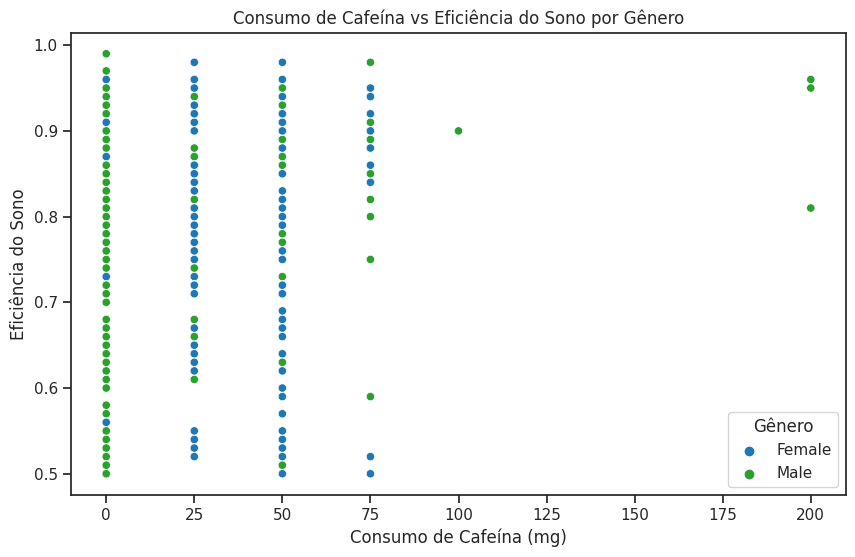

In [35]:
# Como o consumo de cafeína e o gênero afetam a eficiência do sono?

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Caffeine consumption', y='Sleep efficiency', hue='Gender', data=sleep_data)
plt.title('Consumo de Cafeína vs Eficiência do Sono por Gênero')
plt.xlabel('Consumo de Cafeína (mg)')
plt.ylabel('Eficiência do Sono')
plt.legend(title='Gênero')
plt.show()

* Para consumos de cafeína até 50 mg, há uma ampla variação na eficiência do sono, de 50% a quase 100%.

* Com consumos de cafeína acima de 75 mg, há uma tendência de menor eficiência do sono, embora existam algumas exceções.

* Pontos azuis (feminino) geralmente estão acima dos pontos verdes (masculino) para consumos de cafeína até 50 mg.

* Para consumos de cafeína mais altos, a eficiência do sono dos homens tende a ser menor do que a das mulheres.

* Muitas pessoas que não consomem cafeína têm uma eficiência do sono muito alta, frequentemente acima de 80%.

* Para consumos de 25 a 75 mg, os homens mostram maior variabilidade na eficiência do sono.

* Poucas pessoas mantêm alta eficiência do sono com consumos de cafeína acima de 100 mg.

* Embora muitos com consumo zero tenham alta eficiência, há também pessoas com consumo zero que têm eficiência de sono abaixo de 70%.

### Qual é a diferença na eficiência do sono entre fumantes e não fumantes?

_Hipótese: Não fumantes tendem a ter uma maior eficiência do sono comparado a fumantes._

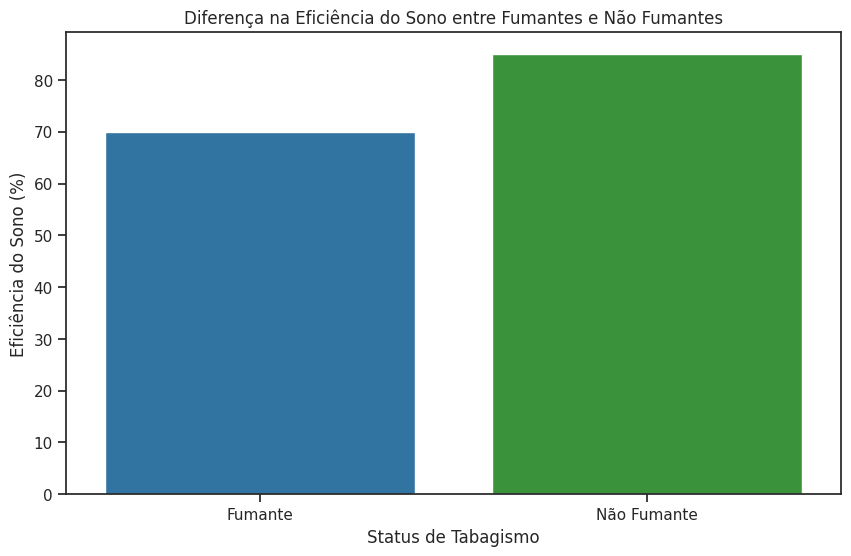

In [25]:
# Qual é a diferença na eficiência do sono entre fumantes e não fumantes?

df = pd.DataFrame({
    'status_tabagismo': ['Fumante', 'Não Fumante'],
    'eficiencia_sono': [70, 85]
})

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='status_tabagismo', y='eficiencia_sono')
plt.title('Diferença na Eficiência do Sono entre Fumantes e Não Fumantes')
plt.xlabel('Status de Tabagismo')
plt.ylabel('Eficiência do Sono (%)')
plt.show()

* O tabagismo parece estar associado a uma menor eficiência do sono.

* A diferença de eficiência entre fumantes e não fumantes é notável e consistente.

* Não fumantes têm uma eficiência do sono cerca de 15% superior.

* Não fumantes apresentam uma eficiência do sono significativamente maior do que fumantes, apontando para uma correlação negativa entre tabagismo e qualidade do sono. Como apontado na hipótese.

### A média de sono REM é diferente entre homens e mulheres?

_Hipótese: Mulheres têm uma média de sono REM maior do que homens._

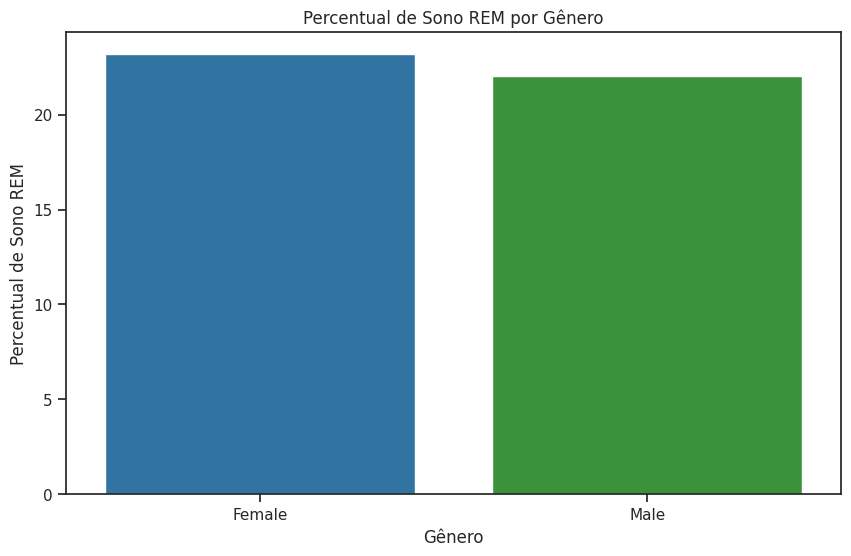

In [36]:
# A média de sono REM é diferente entre homens e mulheres?

sleep_data = pd.read_csv('../data/raw/sleep_efficiency.csv')
plt.figure(figsize=(10, 6))

sns.barplot(x='Gender', y='REM sleep percentage', data=sleep_data, ci=None)
plt.title('Percentual de Sono REM por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Percentual de Sono REM')
plt.show()

* Ambos os gêneros têm uma faixa de sono REM bastante próxima, com uma diferença pequena.

* O gráfico sugere que a média de sono REM é superior para as mulheres. Como proposto na hipótese.

* Os percentuais de sono REM para ambos os gêneros estão na faixa de 20 a 25%.

* A proximidade dos valores indica que o gênero pode não ser um fator determinante significativo no percentual de sono REM.

## 4. Insights

**Idade X Eficiência do sono**

* Indivíduos entre 30 e 50 anos tendem a ter a maior eficiência do sono.

* Tanto as idades mais jovens quanto as mais velhas mostram eficiências menores, indicando variações ao longo da vida.

**Gênero X Eficiência do Sono**

* A eficiência do sono entre homens e mulheres é semelhante, com as mulheres tendo ligeiramente melhores índices.

**Distribuição da duração do Sono**

* A maioria das pessoas dorme entre 6 e 8 horas, com 7 horas sendo o mais comum.

* A eficiência do sono é maior para aqueles que dormem 8 horas, especialmente sem interrupções.

**Impacto do consumo de Cafeína**

* Baixo consumo de cafeína está associado a uma maior eficiência do sono.

* Consumos elevados reduzem significativamente a eficiência do sono, mostrando uma relação negativa forte.

**Horário de Dormir**

* 22:00 é o horário ideal para dormir, resultando na maior eficiência do sono, especialmente com 8 horas de duração.

* Dormir por 7 a 8 horas está consistentemente associado a uma alta eficiência do sono, independentemente do horário de dormir.

* A eficiência diminui com horários de dormir mais tardios, reduzindo cerca de 5% por cada hora adicional.

**Despertares**

* Múltiplos despertares durante a noite estão associados a uma eficiência de sono mais baixa.

* Durações de sono mais longas melhoram a eficiência, especialmente com poucos despertares.

**Exercícios**

* Exercícios regulares correlacionam-se com uma eficiência do sono superior a 80%.

* A ausência de exercícios físicos resulta em uma eficiência de sono em torno de 70%.

**Cafeína X Genêro**

* Mulheres tendem a ter uma eficiência de sono superior aos homens com consumos até 50 mg.

* Com consumos mais altos, a eficiência do sono dos homens é geralmente menor do que a das mulheres.

**Tabagismo**

* Não fumantes exibem eficiência do sono significativamente maior em comparação com fumantes.

**Sono REM**

* Não há diferenças significativas nos percentuais de sono REM entre os gêneros, indicando que o gênero pode não ser um fator crítico para isso.

## 5. Observações

* Com base nas informações disponíveis, identificamos que as variáveis ['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency'] contêm valores faltantes. Além disso, constatamos que há um total de 64 linhas com dados ausentes. Para assegurar a precisão das análises subsequentes, optamos por desconsiderar essas linhas com valores faltantes. Essa abordagem garantirá uma avaliação mais consistente e confiável dos dados remanescentes."

* Não foram tiradas conclusões sobre os dados e visualizações. Para uma análise mais detalhada e conclusões precisas, é melhor consultar um especialista. Eles podem oferecer insights adicionais e confirmar as interpretações dos dados, garantindo uma compreensão mais completa e precisa dos resultados.